In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms

In [3]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else :
  DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())


NVIDIA GeForce GTX 1650


In [4]:
print(torch.__version__, DEVICE)

1.12.0 cuda


In [5]:
BATCH_SIZE = 32
EPOCHS = 10

In [8]:
from random import shuffle


train_dataset = datasets.MNIST(root='../data/MNIST/',
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='../data/MNIST/',
                               train=False,
                               download=True,
                               transform=transforms.ToTensor())  
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           )
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)


In [15]:
for (X_train, y_train) in train_loader:
  print('X_train', X_train.size(),'\t', 'y_train', y_train.size())
  print('X_train', X_train.type(),'\t', 'y_train', y_train.type())
  break

X_train torch.Size([32, 1, 28, 28]) 	 y_train torch.Size([32])
X_train torch.FloatTensor 	 y_train torch.LongTensor


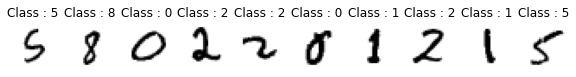

In [19]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28,28), cmap='gray_r')
  plt.title(f'Class : {y_train[i]}')


In [20]:
len(y_train.unique())

10

In [21]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)
    return x

In [36]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = torch.nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [37]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    output = model(image)
    optimizer.zero_grad()
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()


    if batch_idx % log_interval == 0 :
      print(f'Train Epoch: {Epoch} [{batch_idx * len(image)} / {len(train_loader.dataset)} ({(100 * batch_idx / len(train_loader)):.0f}%)]\tTrain Loss : {(loss.item()):.6f}')

In [38]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output= model(image)
      test_loss += criterion(output, label).item()
      prediction= output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [39]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=100)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f'\n[EPOCH: {Epoch}, \tTest Loss: {(test_loss):.4f}, \tTest Accuracy: {(test_accuracy):.2f}%')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1612\2221159829.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train Epoch: 1 [0 / 60000 (0%)]	Train Loss : 2.311049
Train Epoch: 1 [3200 / 60000 (5%)]	Train Loss : 2.196152
Train Epoch: 1 [6400 / 60000 (11%)]	Train Loss : 1.904656
Train Epoch: 1 [9600 / 60000 (16%)]	Train Loss : 1.119170
Train Epoch: 1 [12800 / 60000 (21%)]	Train Loss : 0.799297
Train Epoch: 1 [16000 / 60000 (27%)]	Train Loss : 0.706106
Train Epoch: 1 [19200 / 60000 (32%)]	Train Loss : 0.512342
Train Epoch: 1 [22400 / 60000 (37%)]	Train Loss : 0.409914
Train Epoch: 1 [25600 / 60000 (43%)]	Train Loss : 0.467900
Train Epoch: 1 [28800 / 60000 (48%)]	Train Loss : 0.350379
Train Epoch: 1 [32000 / 60000 (53%)]	Train Loss : 0.720766
Train Epoch: 1 [35200 / 60000 (59%)]	Train Loss : 0.378847
Train Epoch: 1 [38400 / 60000 (64%)]	Train Loss : 0.699214
Train Epoch: 1 [41600 / 60000 (69%)]	Train Loss : 0.265269
Train Epoch: 1 [44800 / 60000 (75%)]	Train Loss : 0.266976
Train Epoch: 1 [48000 / 60000 (80%)]	Train Loss : 0.260370
Train Epoch: 1 [51200 / 60000 (85%)]	Train Loss : 0.358389
Train 

In [11]:
id(BATCH_SIZE)

2338450703568

In [28]:
len(test_loader), len(test_loader.dataset)

(313, 10000)